In [4]:
from glob import glob
import os
from tqdm import tqdm
import numpy as np
import seaborn as sns
from collections import Counter
import SimpleITK as sitk
from radiomics import featureextractor as fe
import pandas as pd
import numpy as np
import nibabel as nib
from copy import deepcopy
import matplotlib.pyplot as plt

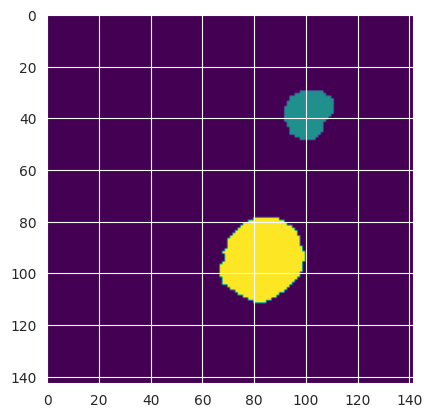

In [7]:
seg = r'/data/projects/TMOR/data/Deeplearning/Oslo09/seg.nii.gz'
vol = nib.load(seg).get_fdata()
idx = vol.sum(axis=0).sum(axis=1).argmax()
plt.imshow(vol[:, idx, :], cmap='viridis')
plt.show()

In [8]:
vol.sum(0).sum(1)

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    4.,   62.,  168.,  434.,
        642.,  804.,  954., 1154., 1280., 1382., 1464., 1540., 1572.,
       1606., 1626., 1638., 1652., 1652., 1648., 1670., 1703., 1737.,
       1794., 1832., 1861., 1891., 1895., 1895., 1884., 1831., 1766.,
       1689., 1588., 1446., 1261., 1097.,  922.,  749.,  506.,  370.,
        246.,  122.,

Lets check the intensity of our image

In [3]:
seg = r'/data/projects/TMOR/data/OsloPreprocessed/OsloPreprocessed/Subject09/seg_9.nii.gz'
reg = r'/data/projects/TMOR/data/OsloPreprocessed/OsloPreprocessed/Subject09/flair.nii.gz'
mask = sitk.ReadImage(seg)
img = sitk.ReadImage(reg)
extractor = fe.RadiomicsFeatureExtractor('/data/projects/TMOR/data/exampleMR_5mm.yaml', preCrop = True)
extractor.settings['binWidth'] = 25
features_segmentation = extractor.execute(img, mask, label = 1)
features_segmentation
df = pd.DataFrame(features_segmentation.items(), columns = ['feature_name', 'feature_value'])
df = df[37:]
df

,feature_name,feature_value
37,original_firstorder_10Percentile,65.64980123564706
38,original_firstorder_90Percentile,183.0963636820559
39,original_firstorder_Energy,22371387.806096382
40,original_firstorder_Entropy,2.8751363115321134
41,original_firstorder_InterquartileRange,71.01738293178396
...,...,...
978,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEm...,0.10964479407551236
979,wavelet-LLL_gldm_LowGrayLevelEmphasis,0.017645796616028372
980,wavelet-LLL_gldm_SmallDependenceEmphasis,0.39023850669299986
981,wavelet-LLL_gldm_SmallDependenceHighGrayLevelE...,75.14668189049814


In [4]:
extractor.settings

{'minimumROIDimensions': 2,
 'minimumROISize': None,
 'normalize': True,
 'normalizeScale': 100,
 'removeOutliers': None,
 'resampledPixelSpacing': [3, 3, 3],
 'interpolator': 'sitkBSpline',
 'preCrop': True,
 'padDistance': 5,
 'distances': [1],
 'force2D': False,
 'force2Ddimension': 0,
 'resegmentRange': None,
 'label': 1,
 'additionalInfo': True,
 'binWidth': 25,
 'voxelArrayShift': 300}

In [5]:
directory = '/data/projects/TMOR/data/OsloPreprocessed/OsloPreprocessed/*/seg_*.nii.gz'
for file in glob(directory):
    mask = sitk.ReadImage(file)
    file_dir = os.path.dirname(file)
    subjid = file_dir.split(os.sep)[-1]
    print(subjid, mask.GetSpacing()) #obtain the voxel sizes of the images by patients

Subject01 (1.0, 1.0, 1.0)
Subject02 (1.0, 1.0, 1.0)
Subject03 (1.0, 1.0, 1.0)
Subject04 (1.0, 1.0, 1.0)
Subject05 (1.0, 1.0, 1.0)
Subject06 (1.0, 1.0, 1.0)
Subject07 (1.0, 1.0, 1.0)
Subject08 (1.0, 1.0, 1.0)
Subject09 (1.0, 1.0, 1.0)
Subject10 (1.0, 1.0, 1.0)
Subject11 (1.0, 1.0, 1.0)
Subject12 (1.0, 1.0, 1.0)
Subject13 (1.0, 1.0, 1.0)
Subject14 (1.0, 1.0, 1.0)
Subject15 (1.0, 1.0, 1.0)
Subject16 (1.0, 1.0, 1.0)
Subject17 (1.0, 1.0, 1.0)
Subject18 (1.0, 1.0, 1.0)
Subject19 (1.0, 1.0, 1.0)
Subject20 (1.0, 1.0, 1.0)
Subject21 (1.0, 1.0, 1.0)
Subject22 (1.0, 1.0, 1.0)
Subject23 (1.0, 1.0, 1.0)
Subject24 (1.0, 1.0, 1.0)
Subject25 (1.0, 1.0, 1.0)
Subject26 (1.0, 1.0, 1.0)
Subject27 (1.0, 1.0, 1.0)
Subject28 (1.0, 1.0, 1.0)
Subject29 (1.0, 1.0, 1.0)
Subject30 (1.0, 1.0, 1.0)
Subject31 (1.0, 1.0, 1.0)
Subject32 (1.0, 1.0, 1.0)
Subject33 (1.0, 1.0, 1.0)
Subject34 (1.0, 1.0, 1.0)
Subject35 (1.0, 1.0, 1.0)
Subject36 (1.0, 1.0, 1.0)
Subject37 (1.0, 1.0, 1.0)
Subject38 (1.0, 1.0, 1.0)
Subject39 (1

In [6]:
num_pixels = sitk.GetArrayFromImage(mask).sum()
# Get the voxel size of the image
voxel_size = mask.GetSpacing()

# Calculate the size in millimeters
size_mm = num_pixels * voxel_size[0] * voxel_size[1] * voxel_size[2]

# Print the size in millimeters
print("ROI size: {:.2f} mm^3 %s".format(num_pixels))


ROI size: 3161.00 mm^3 %s


In [7]:
num_pixels = sitk.GetArrayFromImage(mask)
num_pixels.sum(0).sum(1)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  27.,  56.,  87., 107., 131., 141., 142.,
       145., 145., 136., 133., 125., 113.,  77.,  27.,   3.,   1.,   1.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
        14.,  44., 128., 210., 220., 224., 220., 20

In [8]:
seg = r'/data/projects/TMOR/data/OsloPreprocessed/OsloPreprocessed/Subject09/seg_9.nii.gz'
mask = sitk.ReadImage(seg)
tumor_sizes = []
vol = sitk.GetArrayFromImage(mask)
for unique_value in np.unique(vol):
        if unique_value: #ignore the value 0
            print(subjid, np.sum(vol == unique_value))
            tumor_sizes.append(np.sum(vol == unique_value))

Subject67 3455
Subject67 24799


In [9]:
np.sum(vol == unique_value)

24799

In [10]:
seg = r'/data/projects/TMOR/data/OsloPreprocessed/OsloPreprocessed/Subject09/seg_9.nii.gz'
mask = sitk.ReadImage(seg)
num_components = mask.GetNumberOfComponentsPerPixel()
for i in range(1, num_components+1):
    roi_i = (mask == i)
    num_voxels = sitk.GetArrayFromImage(roi_i).sum()
    print(f"ROI {i}: {num_voxels} voxels")

ROI 1: 3455 voxels


In [11]:
seg = r'/data/projects/TMOR/data/OsloPreprocessed/OsloPreprocessed/Subject09/seg_9.nii.gz'
reg = r'/data/projects/TMOR/data/OsloPreprocessed/OsloPreprocessed/Subject09/flair.nii.gz'
mask = sitk.ReadImage(seg)
img = sitk.ReadImage(reg)
mask_array = sitk.GetArrayFromImage(mask)
voxel_size = img.GetSpacing()
unique_labels = np.unique(mask_array)[1:]  # Exclude background label
for label in unique_labels:
    # Calculate number of voxels in label
    num_voxels = np.count_nonzero(mask_array == label)

    # Convert to physical size
    size_mm = np.multiply(num_voxels, voxel_size)

    # Print size
    print(f"Size of label {label}: {size_mm} mm^3")

Size of label 1.0: [3455. 3455. 3455.] mm^3
Size of label 2.0: [24799. 24799. 24799.] mm^3


In [12]:
np.sum(mask_array == 2)

24799

## Extract radiomics features from the oslo dataset

In [7]:
from radiomics import featureextractor as fe
params = {'verbose': False, 'geometryTolerance': 10 ** 3, 'normalize': True, 'preCrop': True}
extractor = fe.RadiomicsFeatureExtractor(**params)

In [8]:
extractor.settings

{'minimumROIDimensions': 2,
 'minimumROISize': None,
 'normalize': True,
 'normalizeScale': 1,
 'removeOutliers': None,
 'resampledPixelSpacing': None,
 'interpolator': 'sitkBSpline',
 'preCrop': True,
 'padDistance': 5,
 'distances': [1],
 'force2D': False,
 'force2Ddimension': 0,
 'resegmentRange': None,
 'label': 1,
 'additionalInfo': True,
 'verbose': False,
 'geometryTolerance': 1000}

In [3]:
seg_dir = '/data/projects/TMOR/data_v2/Oslo/'
reg_dir = '/data/projects/TMOR/data/OsloPreprocessed/OsloPreprocessed'
counter = 0
df = None
for subj_id in os.listdir(seg_dir):
    #extrasct the correct id from the subjects
    id = int(subj_id[7:9])
    # Define paths to the segmentation and regular t1 postprocessed files for this subject
    seg_glob = os.path.join(seg_dir, f'{subj_id}', f'seg_{id}.nii.gz')
    reg_glob = os.path.join(reg_dir, f'{subj_id}', 't1_gd.nii.gz')
    # Use glob to find all matching files
    seg_paths = glob(seg_glob)
    reg_paths = glob(reg_glob)
    # Loop through all matching segmentation and registration files
    for seg_path, reg_path in zip(seg_paths, reg_paths):
        if os.path.exists(seg_path) and os.path.exists(reg_path): ## only if those path exist
            mask = nib.load(seg_path)
            vol_mask = mask.get_fdata()
            # Extract radiomic features for this mask and image pair
            for roi in np.unique(vol_mask):
                if roi:
                    try:
                        foo = extractor.execute(reg_path, seg_path, label=int(roi)) ##path of the images insteaad of the images themselves
                        #print(reg_path, seg_path)
                    except:
                        tmp_mask = deepcopy(vol_mask)
                        tmp_mask[vol_mask != roi] = 0
                        #print(tmp_mask.shape, tmp_mask.sum())
                        continue
                    radiomics_features = [float(v) for k, v in foo.items() if 'diagnostics' not in k]
                    if df is None:
                        columns = [k.replace('original_', '') for k, v in foo.items() if 'diagnostics' not in k]
                        df = pd.DataFrame(columns=['subjid', 'label', *columns])
                    df.loc[len(df)] = [subj_id, int(roi), *radiomics_features]
                    counter += 1
oslo = df

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [4]:
counter #number of tumors that we will explore

150

In [5]:
oslo.to_excel(r'oslo_radiomic_features.xlsx', index=True)

## Feature extraction Stanford

In [6]:
# Define paths to segmentation and registration directories
seg_dir = '/data/projects/TMOR/data_v2/Stanford/'
reg_dir = '/data/projects/TMOR/data/StanfordPreprocessed/StanfordPreprocessed'
counter = 0
df = None
for subj_id in os.listdir(seg_dir):
    #extrasct the correct id from the subjects
    id = str(int(subj_id.split('_')[-1]))
    # Define paths to the segmentation and regular t1 postprocessed files for this subject
    seg_glob = os.path.join(seg_dir, f'{subj_id}', 'seg.nii.gz')
    reg_glob = os.path.join(reg_dir, f'{subj_id}', 't1_gd.nii.gz')
    seg_paths = glob(seg_glob)
    reg_paths = glob(reg_glob)
    for seg_path, reg_path in zip(seg_paths, reg_paths):
        if os.path.exists(seg_path) and os.path.exists(reg_path):  ## only if those path exist
            mask = nib.load(seg_path)
            vol_mask = mask.get_fdata()
            for roi in np.unique(vol_mask):
                if roi:
                    try:
                        foo = extractor.execute(reg_path, seg_path, label=int(roi))  ##path of the images insteaad of the images themselves
                    except:
                        tmp_mask = deepcopy(vol_mask)
                        tmp_mask[vol_mask != roi] = 0
                        continue
                    radiomics_features = [float(v) for k, v in foo.items() if 'diagnostics' not in k]
                    if df is None:
                        columns = [k.replace('original_', '') for k, v in foo.items() if 'diagnostics' not in k]
                        df = pd.DataFrame(columns=['subjid', 'label', *columns])
                    df.loc[len(df)] = [subj_id, int(roi), *radiomics_features]
                    counter += 1
standford = df

GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated
GLCM is symmetrical, therefore Sum Average = 2 * Joint Avera

In [7]:
counter

2286

In [8]:
standford

,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,glszm_SmallAreaHighGrayLevelEmphasis,glszm_SmallAreaLowGrayLevelEmphasis,glszm_ZoneEntropy,glszm_ZonePercentage,glszm_ZoneVariance,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength
0,Mets_005,1,0.865047,0.747948,7.311127,9.774911,11.180340,11.180340,12.206556,12.206556,...,0.510006,0.510000,1.500000,0.009926,29060.187500,0.928924,0.276328,0.017960,0.000388,0.218193
1,Mets_005,2,0.877670,0.618911,5.365802,8.669752,10.000000,9.848858,10.000000,11.180340,...,0.031305,0.031253,1.000000,0.010309,8649.000000,0.308949,0.835021,0.012346,0.000421,0.494671
2,Mets_005,3,0.808071,0.554127,4.770604,8.609218,9.486833,10.295630,9.055385,10.488088,...,0.562528,0.562502,1.500000,0.020833,6533.500000,0.586160,0.440263,0.023660,0.000640,0.332045
3,Mets_009,1,0.849523,0.604049,4.461894,7.386646,7.615773,8.246211,8.544004,9.273618,...,0.020171,0.020011,1.000000,0.017699,2652.250000,0.735910,0.363866,0.048642,0.002560,0.292413
4,Mets_009,2,0.871737,0.490993,1.812445,3.691386,3.162278,4.123106,4.123106,4.242641,...,0.513889,0.500868,1.000000,0.153846,30.250000,0.166667,1.695652,0.090730,0.008496,1.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,Mets_328,16,0.881077,0.621408,4.259090,6.853938,7.211103,8.602325,7.071068,8.660254,...,0.277859,0.277783,2.321928,0.045045,1477.360000,1.840618,0.162112,0.111145,0.013250,0.131121
2282,Mets_338,1,0.538464,0.406576,1.497928,3.684250,3.162278,2.236068,3.605551,3.741657,...,2.007812,0.132812,1.000000,0.222222,12.250000,0.811905,0.923754,0.240564,0.022967,0.955631
2283,Mets_338,2,0.888563,0.745677,3.457617,4.636885,5.000000,5.385165,5.000000,5.477226,...,0.504825,0.503964,1.500000,0.093023,173.187500,1.840310,0.208622,0.222947,0.045280,0.183328
2284,Mets_338,3,0.622617,0.416846,4.370294,10.484195,8.544004,8.602325,11.401754,13.784049,...,0.261648,0.261579,2.251629,0.051724,1158.555556,3.058966,0.112193,0.153676,0.024238,0.105462


In [20]:
standford.to_excel(r'standford_radiomic_features.xlsx', index=True)

## Lets join  all the information together

In [157]:
oslo_labels = pd.read_excel('oslo_labels.xlsx')
oslo_labels = oslo_labels.drop(['breast', 'lung', 'melanoma', 'other'], axis = 1)

def create_labels(row):
    if row['labels'] == 'melanoma':
        return 0
    elif row['labels'] == 'lung':
        return 1
    elif row['labels'] == 'breast':
        return 2
    elif row['labels'] == 'other':
        return 3
    else:
        return row['labels']

oslo_labels['labels'] = oslo_labels.apply(create_labels, axis=1)
oslo_labels

,SubjectNumber,Number_tumors,Age,number_annotations,Sex,F,M,labels
0,Subject01,2,58,1,M,0,1,0
1,Subject02,6,50,1,F,1,0,1
2,Subject03,4,64,1,M,0,1,0
3,Subject04,1,56,1,M,0,1,0
4,Subject05,2,54,1,F,1,0,0
...,...,...,...,...,...,...,...,...
61,Subject62,1,77,1,M,0,1,1
62,Subject63,4,32,1,M,0,1,0
63,Subject64,2,63,1,F,1,0,1
64,Subject65,4,65,1,F,1,0,1


In [158]:
oslo_radiomic_features = pd.read_excel('oslo_radiomic_features.xlsx')
oslo_radiomic_features

,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,glszm_SmallAreaHighGrayLevelEmphasis,glszm_SmallAreaLowGrayLevelEmphasis,glszm_ZoneEntropy,glszm_ZonePercentage,glszm_ZoneVariance,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength
0,Subject01,1,0.829356,0.682981,8.512717,12.464063,14.866069,14.560220,12.529964,15.394804,...,2.166674,0.135418,1.792481e+00,0.008097,30397.250000,158.977235,0.008929,0.302273,0.074659,0.008950
1,Subject01,2,0.944143,0.900681,14.133927,15.692487,17.804494,19.416488,18.681542,19.467922,...,0.613006,0.613006,1.885378e+00,0.009406,193511.580579,39.445794,0.007407,0.115448,0.010426,0.007130
2,Subject02,2,0.928459,0.713136,2.243723,3.146274,3.162278,3.162278,3.605551,3.741657,...,0.510204,0.500638,1.000000e+00,0.133333,42.250000,0.121296,2.290076,0.058222,0.005793,1.432225
3,Subject02,3,0.826679,0.749093,3.527058,4.708440,4.472136,5.385165,5.099020,5.477226,...,0.021134,0.020071,1.000000e+00,0.042553,342.250000,0.785222,0.378833,0.112327,0.013091,0.309023
4,Subject02,4,0.849295,0.841082,8.703783,10.348315,10.816654,11.704700,11.704700,12.449900,...,0.379662,0.379659,2.251629e+00,0.010929,28454.916667,14.239428,0.022868,0.159307,0.020316,0.023465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Subject65,4,0.408248,0.000000,0.000000,3.464102,2.000000,3.000000,3.162278,3.162278,...,0.062500,0.062500,-3.203427e-16,0.250000,0.000000,0.000000,1000000.000000,0.000000,0.000000,0.000000
146,Subject66,1,0.860610,0.856119,7.661783,8.949440,10.440307,9.486833,10.440307,10.677078,...,0.333490,0.333479,1.584963e+00,0.007895,21244.222222,6.817704,0.045463,0.115769,0.015281,0.038685
147,Subject67,1,0.943599,0.825531,11.733414,14.213166,15.620499,16.155494,19.697716,20.099751,...,0.437513,0.437513,2.098930e+00,0.009458,109082.728889,38.599732,0.008525,0.147930,0.020909,0.008112
148,Subject67,2,0.892186,0.810986,2.977519,3.671478,4.472136,4.472136,4.123106,4.582576,...,0.503472,0.500217,1.000000e+00,0.080000,132.250000,0.181882,1.462255,0.054710,0.002566,1.197101


In [160]:
oslo_all = pd.merge(oslo_radiomic_features, oslo_labels, how = 'inner', left_on='subjid', right_on='SubjectNumber')
#oslo = df.set_index(['subjid', 'label'])
oslo_all = oslo_all.drop(['SubjectNumber', 'Number_tumors', 'Sex'], axis = 1)
oslo_all.to_excel(r'oslo_all.xlsx', index=False)
oslo_all

,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,Age,number_annotations,F,M,labels
0,Subject01,1,0.829356,0.682981,8.512717,12.464063,14.866069,14.560220,12.529964,15.394804,...,158.977235,0.008929,0.302273,0.074659,0.008950,58,1,0,1,0
1,Subject01,2,0.944143,0.900681,14.133927,15.692487,17.804494,19.416488,18.681542,19.467922,...,39.445794,0.007407,0.115448,0.010426,0.007130,58,1,0,1,0
2,Subject02,2,0.928459,0.713136,2.243723,3.146274,3.162278,3.162278,3.605551,3.741657,...,0.121296,2.290076,0.058222,0.005793,1.432225,50,1,1,0,1
3,Subject02,3,0.826679,0.749093,3.527058,4.708440,4.472136,5.385165,5.099020,5.477226,...,0.785222,0.378833,0.112327,0.013091,0.309023,50,1,1,0,1
4,Subject02,4,0.849295,0.841082,8.703783,10.348315,10.816654,11.704700,11.704700,12.449900,...,14.239428,0.022868,0.159307,0.020316,0.023465,50,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Subject65,1,0.855166,0.800732,20.767148,25.935220,28.301943,26.683328,29.832868,31.048349,...,204.346342,0.001758,0.163391,0.027139,0.001712,65,1,1,0,1
141,Subject65,2,0.842210,0.762170,6.820878,8.949284,9.486833,10.000000,10.295630,10.677078,...,1.579231,0.164355,0.037328,0.000915,0.160495,65,1,1,0,1
142,Subject65,3,0.973216,0.814385,21.189772,26.019365,34.365681,34.000000,37.589892,38.716921,...,255.052021,0.001400,0.164962,0.026721,0.001384,65,1,1,0,1
143,Subject65,4,0.408248,0.000000,0.000000,3.464102,2.000000,3.000000,3.162278,3.162278,...,0.000000,1000000.000000,0.000000,0.000000,0.000000,65,1,1,0,1


In [161]:
def change_ids(row):
    string = list(row['subjid'])
    string[0:7] = "Oslo"
    new = ''.join(string)
    return new

oslo_all['subjid'] = oslo_all.apply(change_ids, axis=1)
oslo_all

,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,Age,number_annotations,F,M,labels
0,Oslo01,1,0.829356,0.682981,8.512717,12.464063,14.866069,14.560220,12.529964,15.394804,...,158.977235,0.008929,0.302273,0.074659,0.008950,58,1,0,1,0
1,Oslo01,2,0.944143,0.900681,14.133927,15.692487,17.804494,19.416488,18.681542,19.467922,...,39.445794,0.007407,0.115448,0.010426,0.007130,58,1,0,1,0
2,Oslo02,2,0.928459,0.713136,2.243723,3.146274,3.162278,3.162278,3.605551,3.741657,...,0.121296,2.290076,0.058222,0.005793,1.432225,50,1,1,0,1
3,Oslo02,3,0.826679,0.749093,3.527058,4.708440,4.472136,5.385165,5.099020,5.477226,...,0.785222,0.378833,0.112327,0.013091,0.309023,50,1,1,0,1
4,Oslo02,4,0.849295,0.841082,8.703783,10.348315,10.816654,11.704700,11.704700,12.449900,...,14.239428,0.022868,0.159307,0.020316,0.023465,50,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,Oslo65,1,0.855166,0.800732,20.767148,25.935220,28.301943,26.683328,29.832868,31.048349,...,204.346342,0.001758,0.163391,0.027139,0.001712,65,1,1,0,1
141,Oslo65,2,0.842210,0.762170,6.820878,8.949284,9.486833,10.000000,10.295630,10.677078,...,1.579231,0.164355,0.037328,0.000915,0.160495,65,1,1,0,1
142,Oslo65,3,0.973216,0.814385,21.189772,26.019365,34.365681,34.000000,37.589892,38.716921,...,255.052021,0.001400,0.164962,0.026721,0.001384,65,1,1,0,1
143,Oslo65,4,0.408248,0.000000,0.000000,3.464102,2.000000,3.000000,3.162278,3.162278,...,0.000000,1000000.000000,0.000000,0.000000,0.000000,65,1,1,0,1


## Standford data we will do the same

In [164]:
standford_labels = pd.read_excel('standford_labels.xlsx')
standford_labels = standford_labels.drop(['breast', 'lung', 'melanoma', 'other'], axis = 1)
standford_labels['labels'] = standford_labels.apply(create_labels, axis=1)
standford_labels

,Patient_ID,Number_tumors,Age,number_annotations,Sex,F,M,labels
0,5,3,74,1,M,0,1,1
1,9,13,29,1,F,1,0,2
2,10,3,69,1,F,1,0,1
3,11,3,36,1,F,1,0,2
4,13,2,56,1,F,1,0,1
...,...,...,...,...,...,...,...,...
150,321,5,56,1,M,0,1,3
151,323,23,72,1,M,0,1,1
152,326,1,50,1,M,0,1,2
153,328,16,53,1,M,0,1,1


In [150]:
standford_labels.iloc[:, 0]

0        5
1        9
2       10
3       11
4       13
      ... 
150    321
151    323
152    326
153    328
154    338
Name: Patient_ID, Length: 155, dtype: int64

In [165]:
def create_ids(row):
    patient_id = str(row['Patient_ID'])
    if row['Patient_ID'] < 100:
        if len(patient_id) < 2:
            return 'Mets_00' + patient_id
        elif len(patient_id) > 1:
            return 'Mets_0' + patient_id
    else:
        return 'Mets_' + patient_id

standford_labels['Patient_ID'] = standford_labels.apply(create_ids, axis=1)
standford_labels

,Patient_ID,Number_tumors,Age,number_annotations,Sex,F,M,labels
0,Mets_005,3,74,1,M,0,1,1
1,Mets_009,13,29,1,F,1,0,2
2,Mets_010,3,69,1,F,1,0,1
3,Mets_011,3,36,1,F,1,0,2
4,Mets_013,2,56,1,F,1,0,1
...,...,...,...,...,...,...,...,...
150,Mets_321,5,56,1,M,0,1,3
151,Mets_323,23,72,1,M,0,1,1
152,Mets_326,1,50,1,M,0,1,2
153,Mets_328,16,53,1,M,0,1,1


In [166]:
standford_radiomic_features = pd.read_excel('standford_radiomic_features.xlsx')
standford_radiomic_features = standford_radiomic_features.iloc[:, 1:]
standford_radiomic_features

,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,glszm_SmallAreaHighGrayLevelEmphasis,glszm_SmallAreaLowGrayLevelEmphasis,glszm_ZoneEntropy,glszm_ZonePercentage,glszm_ZoneVariance,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength
0,Mets_005,1,0.865047,0.747948,7.311127,9.774911,11.180340,11.180340,12.206556,12.206556,...,0.510006,0.510000,1.500000,0.009926,29060.187500,0.928924,0.276328,0.017960,0.000388,0.218193
1,Mets_005,2,0.877670,0.618911,5.365802,8.669752,10.000000,9.848858,10.000000,11.180340,...,0.031305,0.031253,1.000000,0.010309,8649.000000,0.308949,0.835021,0.012346,0.000421,0.494671
2,Mets_005,3,0.808071,0.554127,4.770604,8.609218,9.486833,10.295630,9.055385,10.488088,...,0.562528,0.562502,1.500000,0.020833,6533.500000,0.586160,0.440263,0.023660,0.000640,0.332045
3,Mets_009,1,0.849523,0.604049,4.461894,7.386646,7.615773,8.246211,8.544004,9.273618,...,0.020171,0.020011,1.000000,0.017699,2652.250000,0.735910,0.363866,0.048642,0.002560,0.292413
4,Mets_009,2,0.871737,0.490993,1.812445,3.691386,3.162278,4.123106,4.123106,4.242641,...,0.513889,0.500868,1.000000,0.153846,30.250000,0.166667,1.695652,0.090730,0.008496,1.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,Mets_328,16,0.881077,0.621408,4.259090,6.853938,7.211103,8.602325,7.071068,8.660254,...,0.277859,0.277783,2.321928,0.045045,1477.360000,1.840618,0.162112,0.111145,0.013250,0.131121
2282,Mets_338,1,0.538464,0.406576,1.497928,3.684250,3.162278,2.236068,3.605551,3.741657,...,2.007812,0.132812,1.000000,0.222222,12.250000,0.811905,0.923754,0.240564,0.022967,0.955631
2283,Mets_338,2,0.888563,0.745677,3.457617,4.636885,5.000000,5.385165,5.000000,5.477226,...,0.504825,0.503964,1.500000,0.093023,173.187500,1.840310,0.208622,0.222947,0.045280,0.183328
2284,Mets_338,3,0.622617,0.416846,4.370294,10.484195,8.544004,8.602325,11.401754,13.784049,...,0.261648,0.261579,2.251629,0.051724,1158.555556,3.058966,0.112193,0.153676,0.024238,0.105462


In [167]:
standford_all = pd.merge(standford_radiomic_features, standford_labels, how = 'inner', left_on='subjid', right_on='Patient_ID')
standford_all = standford_all.drop(['Patient_ID', 'Number_tumors', 'Sex'], axis = 1)
standford_all.to_excel(r'standford_all.xlsx', index=False)
standford_all

,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,Age,number_annotations,F,M,labels
0,Mets_005,1,0.865047,0.747948,7.311127,9.774911,11.180340,11.180340,12.206556,12.206556,...,0.928924,0.276328,0.017960,0.000388,0.218193,74,1,0,1,1
1,Mets_005,2,0.877670,0.618911,5.365802,8.669752,10.000000,9.848858,10.000000,11.180340,...,0.308949,0.835021,0.012346,0.000421,0.494671,74,1,0,1,1
2,Mets_005,3,0.808071,0.554127,4.770604,8.609218,9.486833,10.295630,9.055385,10.488088,...,0.586160,0.440263,0.023660,0.000640,0.332045,74,1,0,1,1
3,Mets_009,1,0.849523,0.604049,4.461894,7.386646,7.615773,8.246211,8.544004,9.273618,...,0.735910,0.363866,0.048642,0.002560,0.292413,29,1,1,0,2
4,Mets_009,2,0.871737,0.490993,1.812445,3.691386,3.162278,4.123106,4.123106,4.242641,...,0.166667,1.695652,0.090730,0.008496,1.285714,29,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,Mets_328,16,0.881077,0.621408,4.259090,6.853938,7.211103,8.602325,7.071068,8.660254,...,1.840618,0.162112,0.111145,0.013250,0.131121,53,1,0,1,1
2279,Mets_338,1,0.538464,0.406576,1.497928,3.684250,3.162278,2.236068,3.605551,3.741657,...,0.811905,0.923754,0.240564,0.022967,0.955631,42,1,1,0,1
2280,Mets_338,2,0.888563,0.745677,3.457617,4.636885,5.000000,5.385165,5.000000,5.477226,...,1.840310,0.208622,0.222947,0.045280,0.183328,42,1,1,0,1
2281,Mets_338,3,0.622617,0.416846,4.370294,10.484195,8.544004,8.602325,11.401754,13.784049,...,3.058966,0.112193,0.153676,0.024238,0.105462,42,1,1,0,1


In [168]:
def change_ids(row):
    #patient_id = str(row['Patient_ID'])
    #row['subjid'] = list(row['subjid'])
    pene = list(row['subjid'])
    pene[0:5] = "Stan_"
    new = ''.join(pene)
    return new

standford_all['subjid'] = standford_all.apply(change_ids, axis=1)
standford_all

,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,Age,number_annotations,F,M,labels
0,Stan_005,1,0.865047,0.747948,7.311127,9.774911,11.180340,11.180340,12.206556,12.206556,...,0.928924,0.276328,0.017960,0.000388,0.218193,74,1,0,1,1
1,Stan_005,2,0.877670,0.618911,5.365802,8.669752,10.000000,9.848858,10.000000,11.180340,...,0.308949,0.835021,0.012346,0.000421,0.494671,74,1,0,1,1
2,Stan_005,3,0.808071,0.554127,4.770604,8.609218,9.486833,10.295630,9.055385,10.488088,...,0.586160,0.440263,0.023660,0.000640,0.332045,74,1,0,1,1
3,Stan_009,1,0.849523,0.604049,4.461894,7.386646,7.615773,8.246211,8.544004,9.273618,...,0.735910,0.363866,0.048642,0.002560,0.292413,29,1,1,0,2
4,Stan_009,2,0.871737,0.490993,1.812445,3.691386,3.162278,4.123106,4.123106,4.242641,...,0.166667,1.695652,0.090730,0.008496,1.285714,29,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,Stan_328,16,0.881077,0.621408,4.259090,6.853938,7.211103,8.602325,7.071068,8.660254,...,1.840618,0.162112,0.111145,0.013250,0.131121,53,1,0,1,1
2279,Stan_338,1,0.538464,0.406576,1.497928,3.684250,3.162278,2.236068,3.605551,3.741657,...,0.811905,0.923754,0.240564,0.022967,0.955631,42,1,1,0,1
2280,Stan_338,2,0.888563,0.745677,3.457617,4.636885,5.000000,5.385165,5.000000,5.477226,...,1.840310,0.208622,0.222947,0.045280,0.183328,42,1,1,0,1
2281,Stan_338,3,0.622617,0.416846,4.370294,10.484195,8.544004,8.602325,11.401754,13.784049,...,3.058966,0.112193,0.153676,0.024238,0.105462,42,1,1,0,1


## Join both tables together now by the columns one under the other

In [169]:
all_patients = pd.concat([oslo_all, standford_all])
all_patients

,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,Age,number_annotations,F,M,labels
0,Oslo01,1,0.829356,0.682981,8.512717,12.464063,14.866069,14.560220,12.529964,15.394804,...,158.977235,0.008929,0.302273,0.074659,0.008950,58,1,0,1,0
1,Oslo01,2,0.944143,0.900681,14.133927,15.692487,17.804494,19.416488,18.681542,19.467922,...,39.445794,0.007407,0.115448,0.010426,0.007130,58,1,0,1,0
2,Oslo02,2,0.928459,0.713136,2.243723,3.146274,3.162278,3.162278,3.605551,3.741657,...,0.121296,2.290076,0.058222,0.005793,1.432225,50,1,1,0,1
3,Oslo02,3,0.826679,0.749093,3.527058,4.708440,4.472136,5.385165,5.099020,5.477226,...,0.785222,0.378833,0.112327,0.013091,0.309023,50,1,1,0,1
4,Oslo02,4,0.849295,0.841082,8.703783,10.348315,10.816654,11.704700,11.704700,12.449900,...,14.239428,0.022868,0.159307,0.020316,0.023465,50,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,Stan_328,16,0.881077,0.621408,4.259090,6.853938,7.211103,8.602325,7.071068,8.660254,...,1.840618,0.162112,0.111145,0.013250,0.131121,53,1,0,1,1
2279,Stan_338,1,0.538464,0.406576,1.497928,3.684250,3.162278,2.236068,3.605551,3.741657,...,0.811905,0.923754,0.240564,0.022967,0.955631,42,1,1,0,1
2280,Stan_338,2,0.888563,0.745677,3.457617,4.636885,5.000000,5.385165,5.000000,5.477226,...,1.840310,0.208622,0.222947,0.045280,0.183328,42,1,1,0,1
2281,Stan_338,3,0.622617,0.416846,4.370294,10.484195,8.544004,8.602325,11.401754,13.784049,...,3.058966,0.112193,0.153676,0.024238,0.105462,42,1,1,0,1


In [186]:
all_patients.to_excel(r'all_patients.xlsx', index=False)

In [185]:
all_patients

,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,Age,number_annotations,F,M,labels
0,Oslo01,1,0.829356,0.682981,8.512717,12.464063,14.866069,14.560220,12.529964,15.394804,...,158.977235,0.008929,0.302273,0.074659,0.008950,58,1,0,1,0
1,Oslo01,2,0.944143,0.900681,14.133927,15.692487,17.804494,19.416488,18.681542,19.467922,...,39.445794,0.007407,0.115448,0.010426,0.007130,58,1,0,1,0
2,Oslo02,2,0.928459,0.713136,2.243723,3.146274,3.162278,3.162278,3.605551,3.741657,...,0.121296,2.290076,0.058222,0.005793,1.432225,50,1,1,0,1
3,Oslo02,3,0.826679,0.749093,3.527058,4.708440,4.472136,5.385165,5.099020,5.477226,...,0.785222,0.378833,0.112327,0.013091,0.309023,50,1,1,0,1
4,Oslo02,4,0.849295,0.841082,8.703783,10.348315,10.816654,11.704700,11.704700,12.449900,...,14.239428,0.022868,0.159307,0.020316,0.023465,50,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,Stan_328,16,0.881077,0.621408,4.259090,6.853938,7.211103,8.602325,7.071068,8.660254,...,1.840618,0.162112,0.111145,0.013250,0.131121,53,1,0,1,1
2279,Stan_338,1,0.538464,0.406576,1.497928,3.684250,3.162278,2.236068,3.605551,3.741657,...,0.811905,0.923754,0.240564,0.022967,0.955631,42,1,1,0,1
2280,Stan_338,2,0.888563,0.745677,3.457617,4.636885,5.000000,5.385165,5.000000,5.477226,...,1.840310,0.208622,0.222947,0.045280,0.183328,42,1,1,0,1
2281,Stan_338,3,0.622617,0.416846,4.370294,10.484195,8.544004,8.602325,11.401754,13.784049,...,3.058966,0.112193,0.153676,0.024238,0.105462,42,1,1,0,1


,subjid,label,shape_Elongation,shape_Flatness,shape_LeastAxisLength,shape_MajorAxisLength,shape_Maximum2DDiameterColumn,shape_Maximum2DDiameterRow,shape_Maximum2DDiameterSlice,shape_Maximum3DDiameter,...,ngtdm_Busyness,ngtdm_Coarseness,ngtdm_Complexity,ngtdm_Contrast,ngtdm_Strength,Age,number_annotations,F,M,labels
0,Oslo01,1,0.829356,0.682981,8.512717,12.464063,14.866069,14.560220,12.529964,15.394804,...,158.977235,0.008929,0.302273,0.074659,0.008950,58,1,0,1,0
1,Oslo01,2,0.944143,0.900681,14.133927,15.692487,17.804494,19.416488,18.681542,19.467922,...,39.445794,0.007407,0.115448,0.010426,0.007130,58,1,0,1,0
2,Oslo02,2,0.928459,0.713136,2.243723,3.146274,3.162278,3.162278,3.605551,3.741657,...,0.121296,2.290076,0.058222,0.005793,1.432225,50,1,1,0,1
3,Oslo02,3,0.826679,0.749093,3.527058,4.708440,4.472136,5.385165,5.099020,5.477226,...,0.785222,0.378833,0.112327,0.013091,0.309023,50,1,1,0,1
4,Oslo02,4,0.849295,0.841082,8.703783,10.348315,10.816654,11.704700,11.704700,12.449900,...,14.239428,0.022868,0.159307,0.020316,0.023465,50,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,Stan_328,16,0.881077,0.621408,4.259090,6.853938,7.211103,8.602325,7.071068,8.660254,...,1.840618,0.162112,0.111145,0.013250,0.131121,53,1,0,1,1
2279,Stan_338,1,0.538464,0.406576,1.497928,3.684250,3.162278,2.236068,3.605551,3.741657,...,0.811905,0.923754,0.240564,0.022967,0.955631,42,1,1,0,1
2280,Stan_338,2,0.888563,0.745677,3.457617,4.636885,5.000000,5.385165,5.000000,5.477226,...,1.840310,0.208622,0.222947,0.045280,0.183328,42,1,1,0,1
2281,Stan_338,3,0.622617,0.416846,4.370294,10.484195,8.544004,8.602325,11.401754,13.784049,...,3.058966,0.112193,0.153676,0.024238,0.105462,42,1,1,0,1
